# Bank Note Authentication
## Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. Dataset can be used for Binary classification problems.

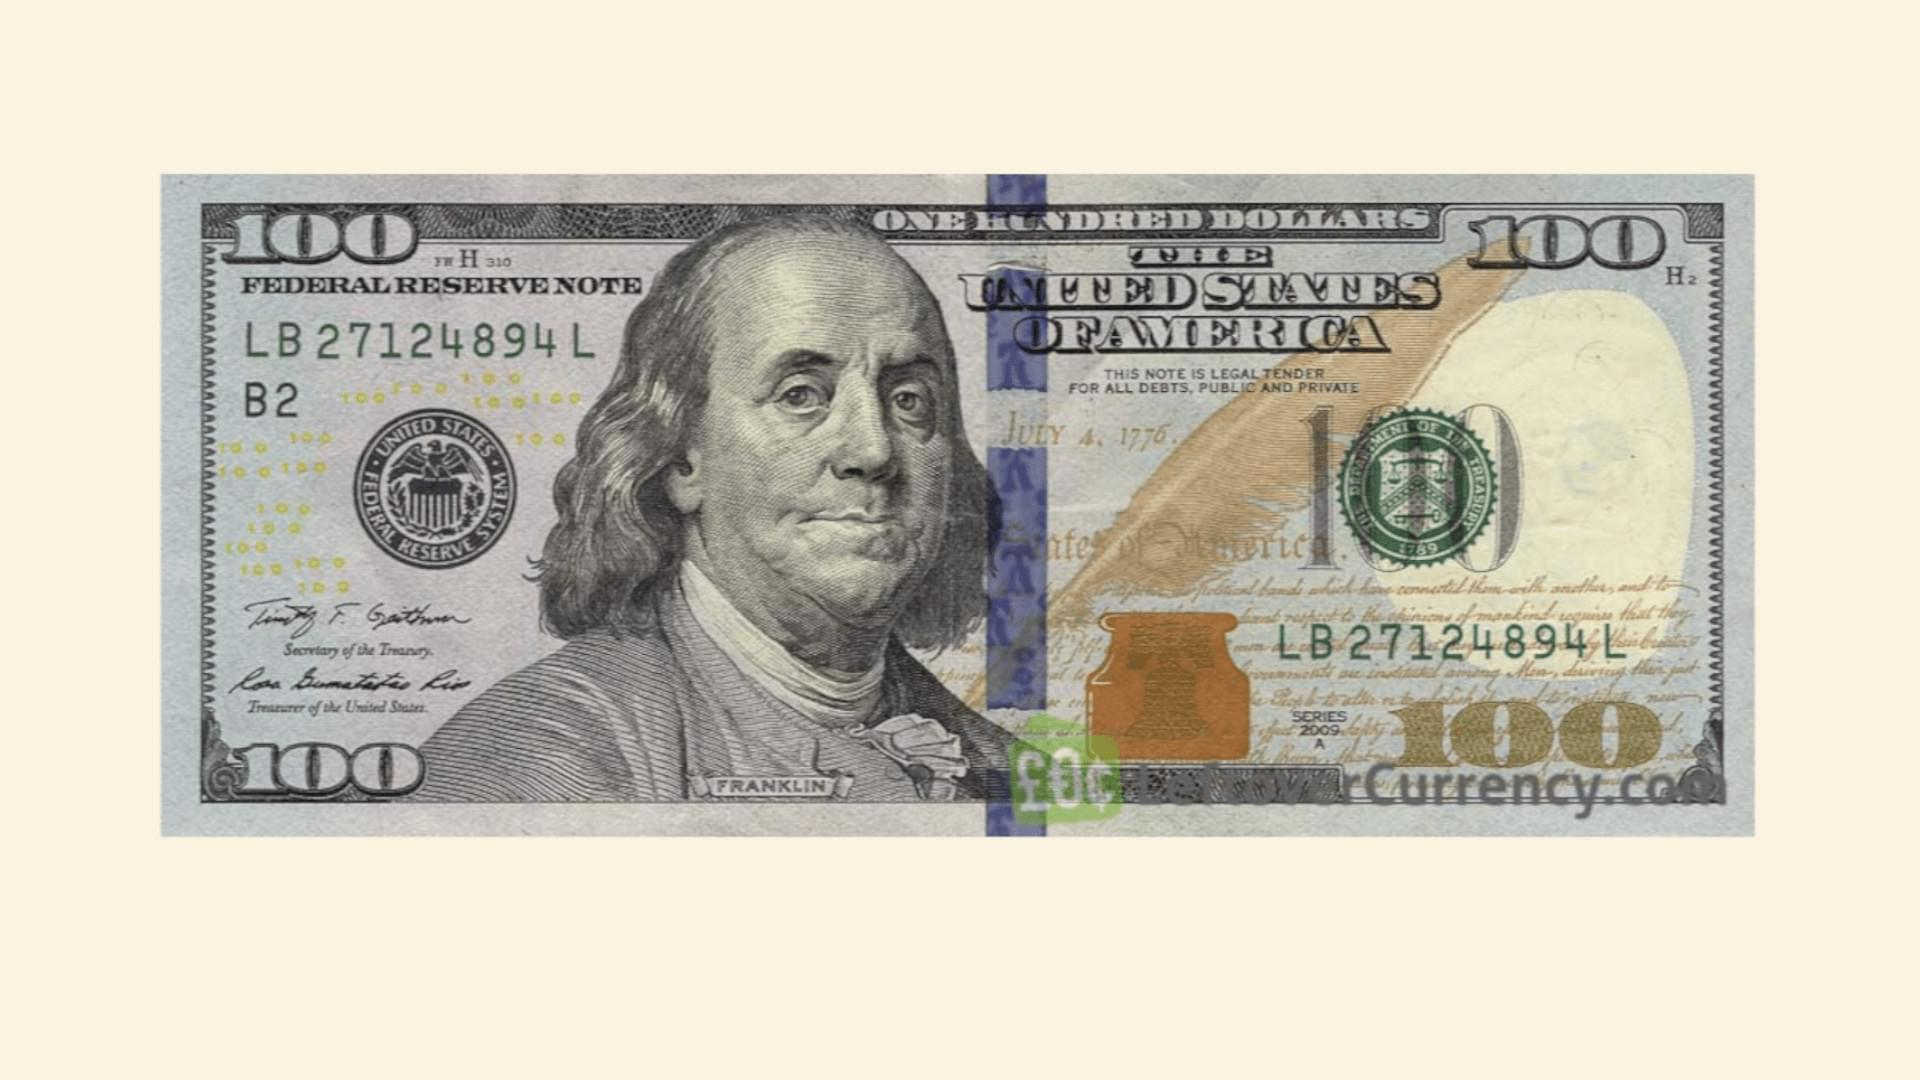

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
df = pd.read_csv('BankNote_Authentication.csv')

In [25]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Type,Note_Type
0,3.62160,8.6661,-2.8073,-0.44699,0,Legit
1,4.54590,8.1674,-2.4586,-1.46210,0,Legit
2,3.86600,-2.6383,1.9242,0.10645,0,Legit
3,3.45660,9.5228,-4.0112,-3.59440,0,Legit
4,0.32924,-4.4552,4.5718,-0.98880,0,Legit


In [26]:
df.describe(include = 'all')
#df.describe()   

,Variance,Skewness,Curtosis,Entropy,Type,Note_Type
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Legit
freq,NaN,NaN,NaN,NaN,NaN,762
mean,0.433735,1.922353,1.397627,-1.191657,0.444606,NaN
std,2.842763,5.869047,4.310030,2.101013,0.497103,NaN
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000,NaN
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000,NaN
50%,0.496180,2.319650,0.616630,-0.586650,0.000000,NaN
75%,2.821475,6.814625,3.179250,0.394810,1.000000,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
Variance     1372 non-null float64
Skewness     1372 non-null float64
Curtosis     1372 non-null float64
Entropy      1372 non-null float64
Type         1372 non-null int64
Note_Type    1372 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


Legit      762
Forgery    610
Name: Note_Type, dtype: int64

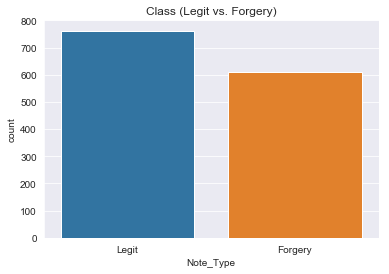

In [28]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Note_Type', data = df)
plt.title('Class (Legit vs. Forgery)')
df['Note_Type'].value_counts()#normalize = True)

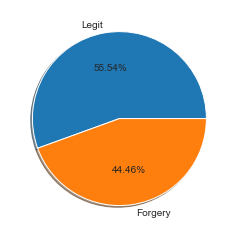

In [29]:
plt.pie(df['Note_Type'].value_counts(), labels = ['Legit', 'Forgery'], shadow = True, autopct = '%1.2f%%');

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


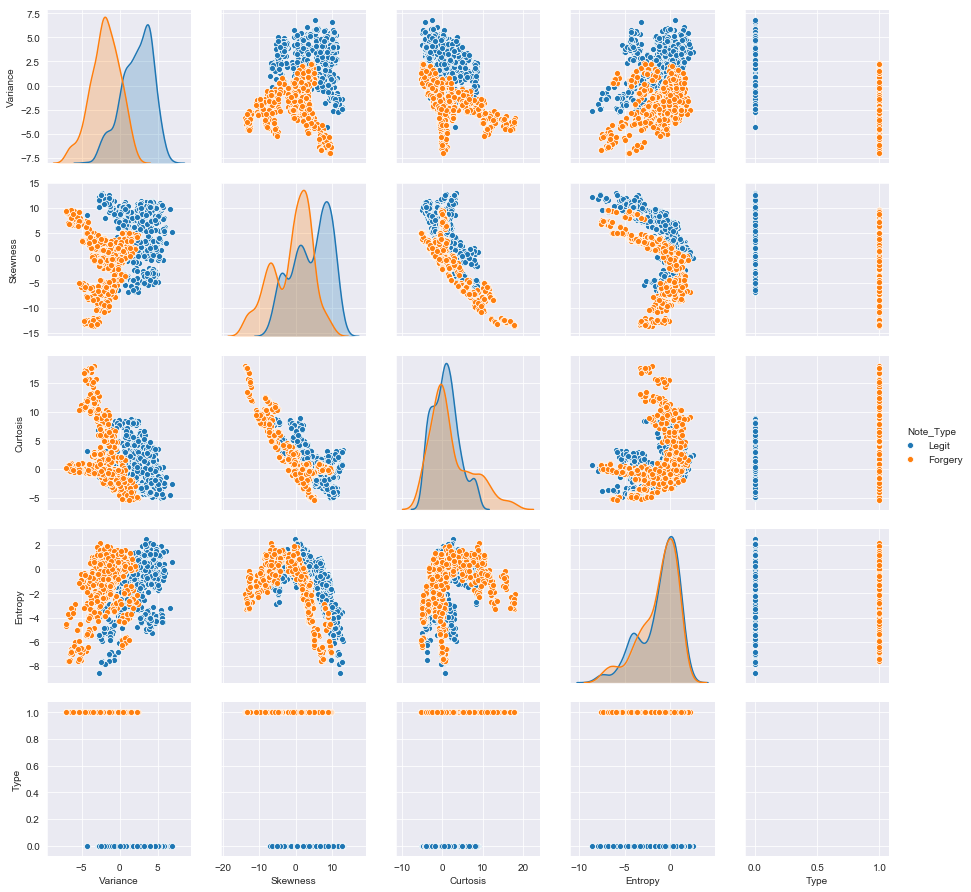

In [30]:
# Import seaborn
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
# Use pairplot and set the hue to be our class
sns.pairplot(df, hue='Note_Type') 

# Show the plot
plt.show()

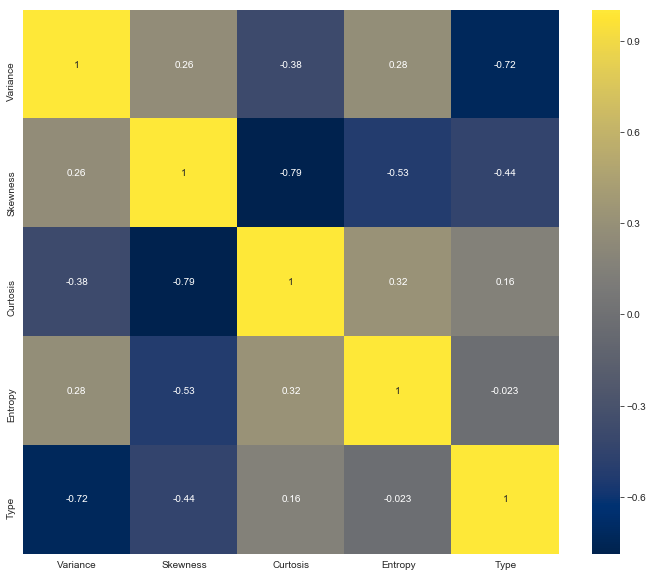

In [31]:
corrmat = df.corr()
plt.figure(figsize=(12,10))
#plot heat map
sns.heatmap(corrmat, annot=True, cmap=
                                        #"RdYlGn"
                                        #"inferno"
                                        "cividis"
                                        #"bwr"      
                                               )

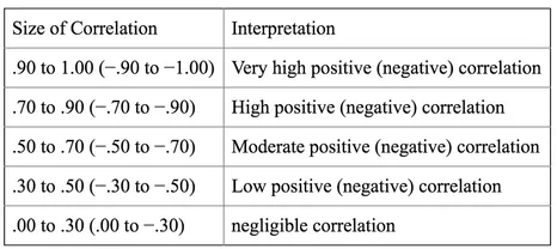

In [32]:
y = df['Note_Type']
X = df.drop(['Type','Note_Type'], axis = 1)

In [33]:
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [34]:
y.head()

0    Legit
1    Legit
2    Legit
3    Legit
4    Legit
Name: Note_Type, dtype: object

In [35]:
features = df.columns
features = features[0:4]
print(features)

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')


In [36]:
dclass = df['Note_Type']
dclass = dclass.unique()
print(dclass)

['Legit' 'Forgery']


[Video on Decision Trees](https://www.youtube-nocookie.com/embed/_L39rN6gz7Y?playlist=_L39rN6gz7Y&autoplay=1&iv_load_policy=3&loop=1&modestbranding=1&start=)

Naive Bayes Classification
Training data accuracy 100.00
Testing data accuracy 99.27
-----------------------------------------------------
              precision    recall  f1-score   support

     Forgery       0.98      1.00      0.99       118
       Legit       1.00      0.99      0.99       157

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



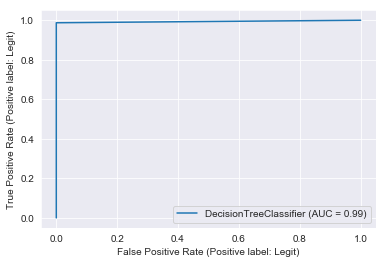

Plot the Classification Tree:


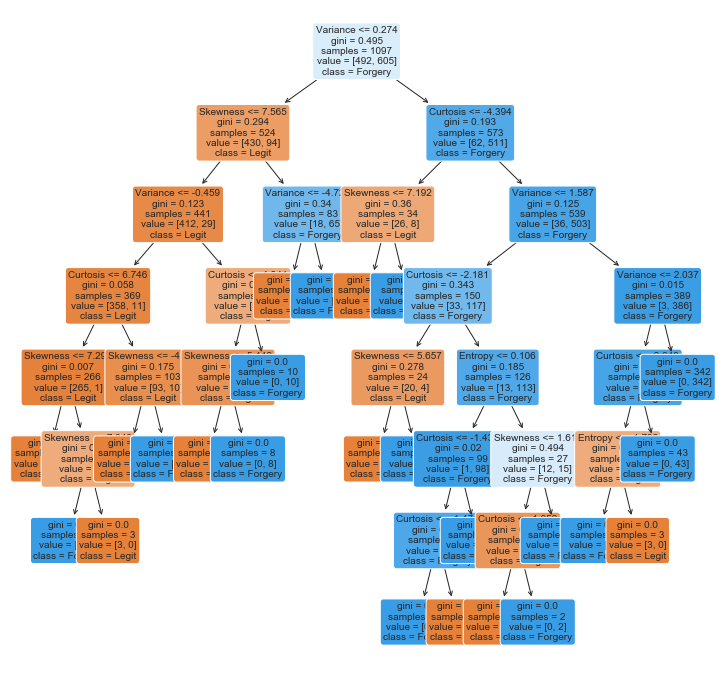

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(
                                        #max_depth=50, 
                                        #min_samples_leaf=1
                                        )
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print('Naive Bayes Classification')
print('Training data accuracy {:.2f}'.format(decision_tree.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(X_test, y_test)*100))

from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))

from sklearn import metrics
metrics.plot_roc_curve(decision_tree, X_test, y_test)
plt.show()
print("Plot the Classification Tree:")
plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree,
               feature_names = features,
               class_names = dclass,
               rounded=True,
               filled=True,
               fontsize=10);

[Video on Naive Bayes](https://www.youtube-nocookie.com/embed/O2L2Uv9pdDA?playlist=O2L2Uv9pdDA&autoplay=1&iv_load_policy=3&loop=1&modestbranding=1&start=)

[Video on Gaussian Naive Bayes](https://www.youtube-nocookie.com/embed/O2L2Uv9pdDA?playlist=O2L2Uv9pdDA&autoplay=1&iv_load_policy=3&loop=1&modestbranding=1&start=))

Naive Bayes Classifier
Training data accuracy 83.87
Testing data accuracy 83.27
-----------------------------------------------------
              precision    recall  f1-score   support

     Forgery       0.81      0.81      0.81       118
       Legit       0.85      0.85      0.85       157

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



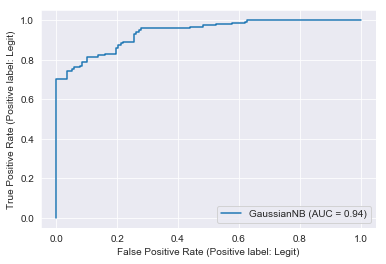

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Naive Bayes Classifier')
print('Training data accuracy {:.2f}'.format(gnb.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(gnb.score(X_test, y_test)*100))
#print('ROC AUC Score {:.2f}'.format(roc_auc_score(y, gnb.predict_proba(X))))
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))

from sklearn import metrics
metrics.plot_roc_curve(gnb, X_test, y_test)
plt.show()

[Support Vector Machines Tutorial](https://www.youtube-nocookie.com/embed/efR1C6CvhmE?playlist=efR1C6CvhmE&autoplay=1&iv_load_policy=3&loop=1&modestbranding=1&start=)

Support Vector Machine (SVM)
Training data accuracy 100.00
Testing data accuracy 100.00
-----------------------------------------------------
              precision    recall  f1-score   support

     Forgery       1.00      1.00      1.00       118
       Legit       1.00      1.00      1.00       157

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



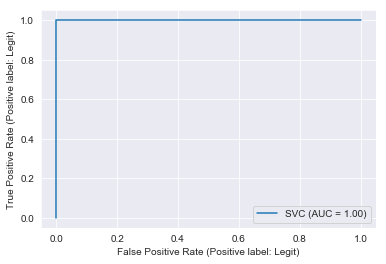

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn import svm
svc = svm.SVC(
                kernel="rbf"
                #kernel="poly"
                )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Support Vector Machine (SVM)')
print('Training data accuracy {:.2f}'.format(svc.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(svc.score(X_test, y_test)*100))

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))

from sklearn import metrics
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show()

Logistic Regression
Training data accuracy 99.00
Testing data accuracy 99.27
-----------------------------------------------------
              precision    recall  f1-score   support

     Forgery       0.98      1.00      0.99       118
       Legit       1.00      0.99      0.99       157

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



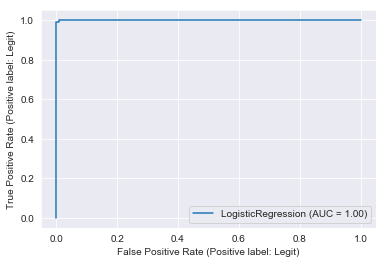

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Training data accuracy {:.2f}'.format(logreg.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(logreg.score(X_test, y_test)*100))

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

Random Forest Classifier
Training data accuracy 100.00
Testing data accuracy 98.55
-----------------------------------------------------
              precision    recall  f1-score   support

     Forgery       0.98      0.98      0.98       118
       Legit       0.99      0.99      0.99       157

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



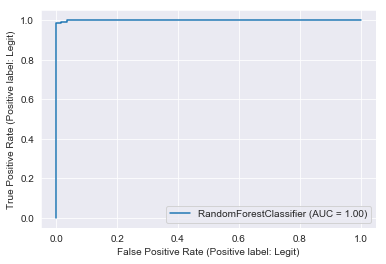

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

print('Random Forest Classifier')
print('Training data accuracy {:.2f}'.format(randomforest.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(randomforest.score(X_test, y_test)*100))

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))
from sklearn import metrics
metrics.plot_roc_curve(randomforest, X_test, y_test)
plt.show()

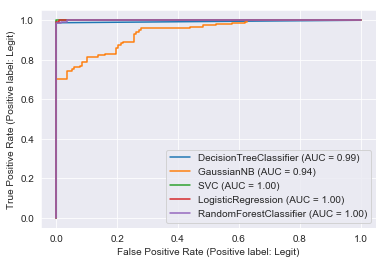

In [42]:
from sklearn.metrics import plot_roc_curve
classifiers = [decision_tree, gnb, svc, logreg, randomforest]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)